<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/dcnn/Algorithums/DCNN/DCNN_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install firebase-admin

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import os
from datetime import date,datetime
import json
import csv

In [ ]:
dataset_path = '/content/drive/MyDrive/AYUSHVISION/working'

In [ ]:
import firebase_admin

In [ ]:
from firebase_admin import credentials,storage


In [ ]:
from firebase_admin import firestore

In [ ]:
epochs=30

In [ ]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/dcnn/fruits/'

In [ ]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

# firebase

In [ ]:
firebase_count=1
if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/AYUSHVISION/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [ ]:
db = firestore.client()

In [ ]:
bucket = storage.bucket()

In [ ]:
dcnn_ref = db.collection("training1").document('dcnn')
doc = dcnn_ref.get()

In [ ]:
if not doc.exists:
  doc_ref= db.collection("training1").document('dcnn')
  doc_ref.set({'algorithum':'dcnn','version':'1','mode':'classification','url':'dcnn'})
else:
  doc_ref= dcnn_ref

### Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basicdata={'account':'rainrobot33','user':"Tharsha"}

In [ ]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='DCNN_Fruits'


In [ ]:
basicdata['names']=os.listdir(os.path.join(dataset_path,'train'))

In [ ]:
today_ref=doc_ref.collection("Fruits").document(document_id)

In [ ]:
today_ref.set(basicdata)

update_time {
  seconds: 1725421942
  nanos: 530695000
}

In [ ]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

In [ ]:
train_data_dir = f'{dataset_path}/train'
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 1676 images belonging to 12 classes.


In [ ]:
validation_data_dir = f'{dataset_path}/val'
validation_datagen = image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 239 images belonging to 12 classes.


In [ ]:
test_data_dir = f'{dataset_path}/test'
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 480 images belonging to 12 classes.


In [ ]:
# Build the CNN model
model=Sequential()
#Adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding dense layersr
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(os.listdir(os.path.join(dataset_path,'train'))),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      75,498,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │              

 Total params: 76,201,420 (290.69 MB)

 Trainable params: 76,197,900 (290.67 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [ ]:
args=json.loads(model.to_json())

In [ ]:
plot_model(model, to_file= f'{working_dir}/dcnn{epochs}.jpg' , show_shapes=True, show_layer_names=True)

InvocationException: Program terminated with status: -6. stderr follows: newtrap: Trapezoid-table overflow 441
dot: trapezoid.c:84: newtrap: Assertion `0' failed.


In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/train/model_summary{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}.jpg')
blob.make_public()

In [ ]:
today_training_colref=today_ref.collection('Train')

In [ ]:
today_training_ref=today_training_colref.document('args')

In [ ]:
today_training_ref.set(args)

update_time {
  seconds: 1725420619
  nanos: 222357000
}

In [ ]:
today_training_summary_ref=today_training_colref.document('model_summary_plot')

In [ ]:
today_training_summary_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1725420623
  nanos: 524922000
}

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
todat_fit_train_ref=today_training_colref.document('fit')

In [ ]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':"categorical_crossentropy",
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1725420629
  nanos: 996767000
}

In [ ]:
# train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.4770 - val_loss: 4.2146
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9951 - loss: 0.0225 - val_accuracy: 0.8159 - val_loss: 0.8768
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9974 - loss: 0.0063 - val_accuracy: 0.6904 - val_loss: 1.4253
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.7071 - val_loss: 1.3213
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.8703 - val_loss: 0.4667
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.9985 - loss: 0.0024 - val_accuracy: 0.8536 - val_loss: 0.6163
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.8410 - val_loss: 0.5013
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy:

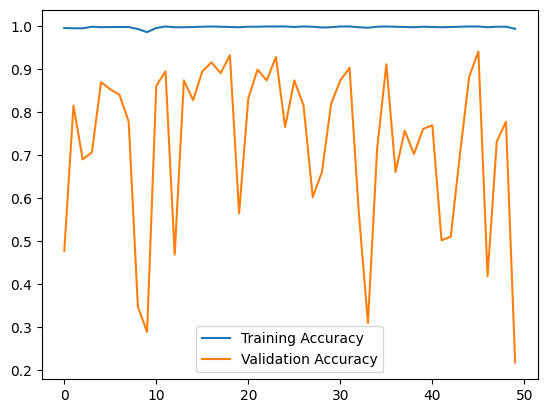

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f"{working_dir}/dcnn{epochs}_model_accuracy.jpg")
plt.show()

In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}_model_accuracy.jpg')
blob.make_public()

In [ ]:
validationref=today_ref.collection('Val')

In [ ]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [ ]:
valhistory_ref.set(
    history.history
)

update_time {
  seconds: 1725421850
  nanos: 219330000
}

In [ ]:
valaccuracy_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1725421853
  nanos: 27568000
}

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.2544 - loss: 12.1633
Test Accuracy: 21.25%


In [ ]:
testref=today_ref.collection('Test')

In [ ]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

update_time {
  seconds: 1725421860
  nanos: 915670000
}

In [ ]:
modelref=today_ref.collection('Model')

In [ ]:
model.save(f'{working_dir}/dcnn_fruits_{epochs}.h5',)

In [ ]:
savemodel=modelref.document('model')

In [ ]:
blob = bucket.blob(f"{storageLocation+document_id}/model/dcnn_fruits_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/dcnn_fruits_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [ ]:
savemodel.set({'model':h5model})

update_time {
  seconds: 1725421905
  nanos: 881001000
}

In [ ]:
directory_path = 'sample/predict'
files = os.listdir(directory_path)

for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)


        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')


FileNotFoundError: [Errno 2] No such file or directory: 'sample/predict'